In [5]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_18638/2202608040.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  impulse_out_rate, impulse_out = wavfile.read(impulse_output_path)


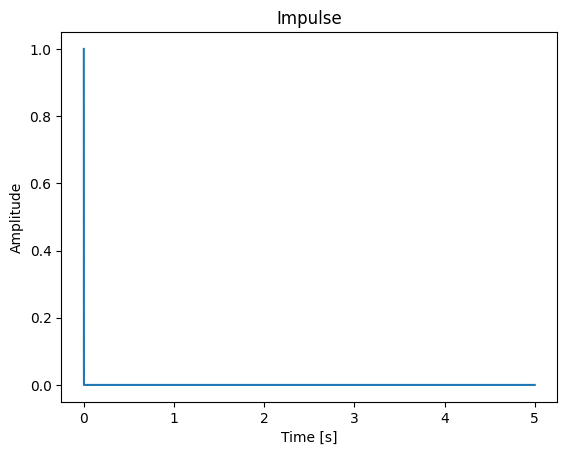

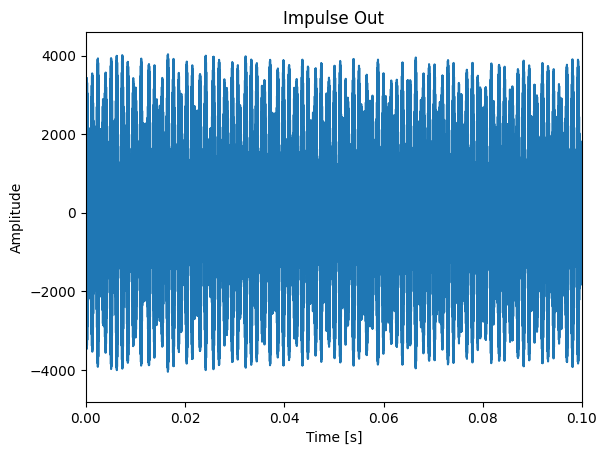

In [6]:
impulse_path = "inputs/impulse.wav"
impulse_output_path = "impulse aup/impulse_out.wav"

impulse_rate, impulse = wavfile.read(impulse_path)

impulse_out_rate, impulse_out = wavfile.read(impulse_output_path)


#plot impulse
t = np.linspace(0, len(impulse)/impulse_rate, len(impulse))
plt.plot(t,impulse)
plt.title("Impulse")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.show()

#plot impulse out
t = np.linspace(0, len(impulse_out)/impulse_out_rate, len(impulse_out))
plt.plot(t,impulse_out)
plt.title("Impulse Out")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, 0.1)
plt.show()



In [7]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # dibujar magnitud
    ax1.plot(frequencies, 20 * np.log10(magnitude))
    ax1.set_title('Bode Diagram')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xscale('log')
    ax1.grid()

    # dibujar fase
    ax2.plot(frequencies, phase * 180 / np.pi)
    ax2.set_ylabel('Phase (degrees)')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_xscale('log')
    ax2.grid()

    plt.tight_layout()
    plt.show()

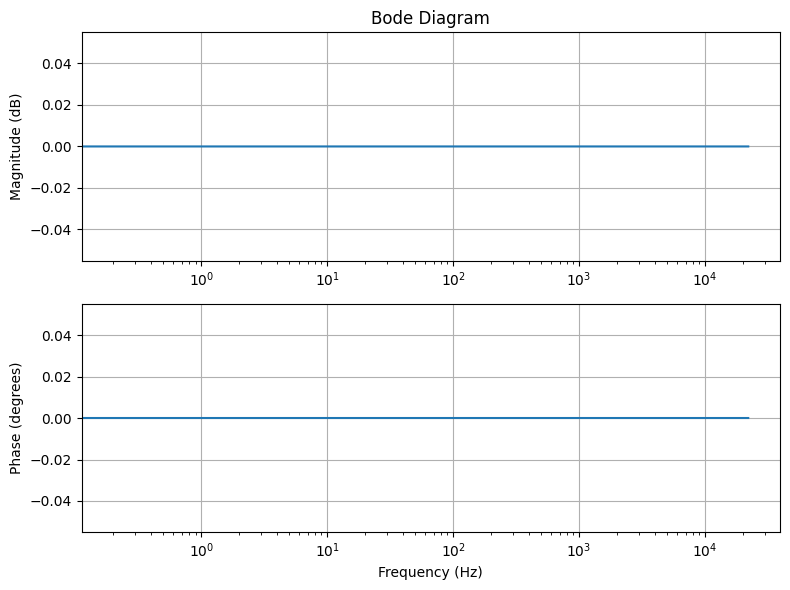

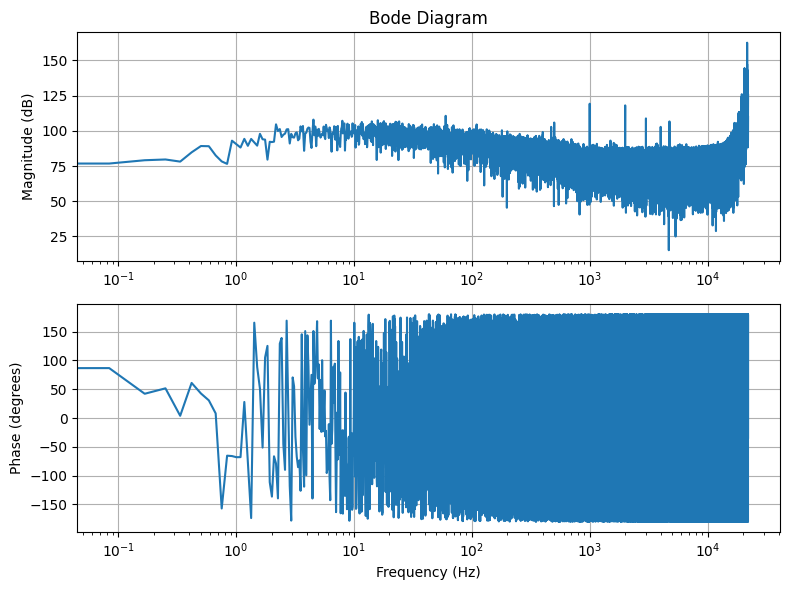

In [8]:
frequencies, magnitude, phase = apply_fft(impulse, impulse_rate)
plot_bode(frequencies, magnitude, phase)

frequencies, magnitude, phase = apply_fft(impulse_out, impulse_out_rate)
plot_bode(frequencies, magnitude, phase)